                                        ________________________ A
  _____________________________________|
 |                                     |_____________________________________ B
_|
 |_________________________________________________ C
 |
 |_________________________________________________ D



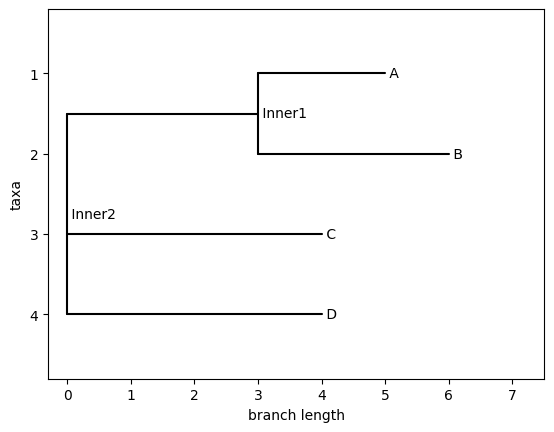

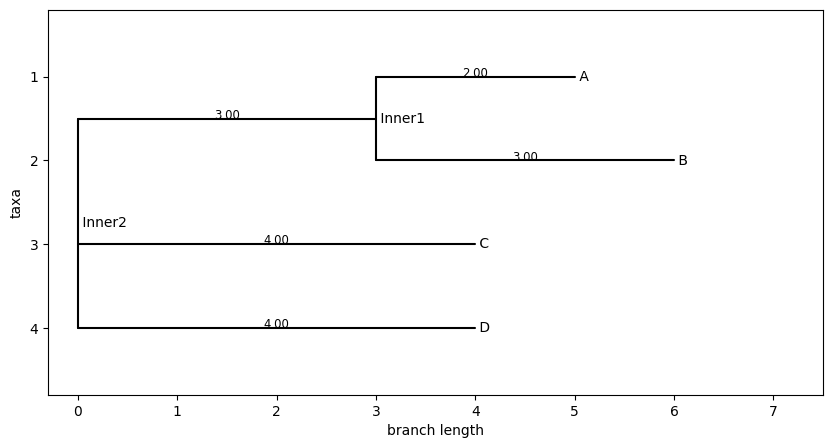

In [ ]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
import matplotlib.pyplot as plt

# 距離行列の作成（A, B, C, D）ただし、DistanceMatrixは下三角のみを受け付けるため、下三角行列
names = ["A", "B", "C", "D"]
matrix = [
    [0],
    [5, 0],
    [9, 10, 0],
    [9, 10, 8, 0]
]

dm = DistanceMatrix(names, matrix)
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

# ASCII形式で系統樹を表示
Phylo.draw_ascii(tree)
# 画像形式で系統樹を表示
Phylo.draw(tree)

# 付加情報もりもりで系統樹を表示
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes, branch_labels=lambda c: f"{c.branch_length:.2f}" if c.branch_length else "")


  _________________ A
 |
 |            ________________________________ F
 |           |
 |     ______|                               ______ H
 |    |      |                      ________|
 |    |      |                     |        |            _________ E
_|    |      |_____________________|        |___________|
 |____|                            |                    |___________________ D
 |    |                            |
 |    |                            |__________________________________ C
 |    |
 |    |______________________ B
 |
 |_________ G



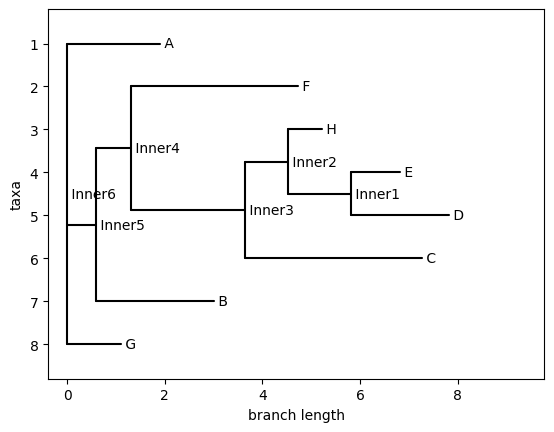

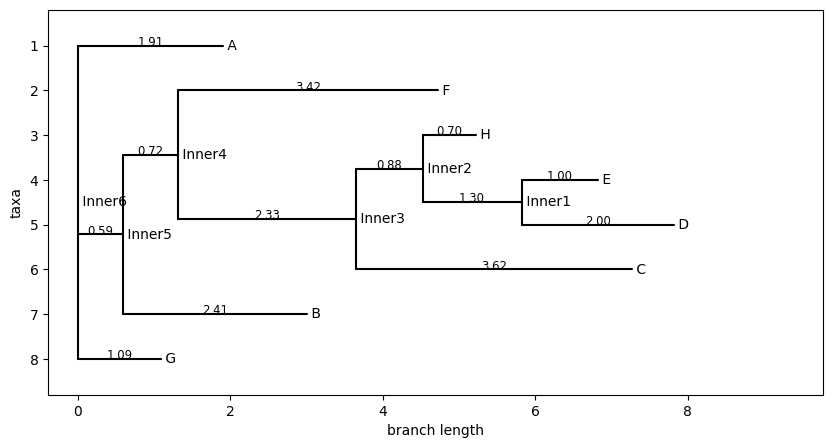

In [ ]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor
import matplotlib.pyplot as plt

# 距離行列のラベル（配列名）
names = ["A", "B", "C", "D", "E", "F", "G", "H"]

# 距離行列
square_matrix = [
    [0, 5, 9, 9, 8, 7, 3, 6],
    [5, 0, 10, 10, 9, 6, 4, 7],
    [9, 10, 0, 8, 7, 9, 8, 5],
    [9, 10, 8, 0, 3, 10, 9, 4],
    [8, 9, 7, 3, 0, 9, 8, 3],
    [7, 6, 9, 10, 9, 0, 6, 8],
    [3, 4, 8, 9, 8, 6, 0, 7],
    [6, 7, 5, 4, 3, 8, 7, 0]
]

# Bio.PhyloのDistanceMatrixは下三角のみを受け付けるため、下三角に変換
lower_triangle = []
for i in range(len(square_matrix)):
    lower_triangle.append([square_matrix[i][j] for j in range(i+1)])

# 距離行列と系統樹の構築
dm = DistanceMatrix(names, lower_triangle)
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

# ASCII形式で系統樹を表示
Phylo.draw_ascii(tree)
# 画像形式で系統樹を表示
Phylo.draw(tree)

# 付加情報もりもりで系統樹を表示
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes, branch_labels=lambda c: f"{c.branch_length:.2f}" if c.branch_length else "")

  ___________________________________________________________________________ C
 |
 | A
_|
 |____________________________________ B
 |
 |____________________________________ D



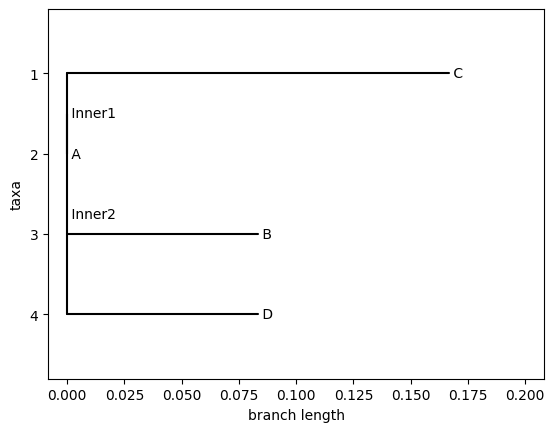

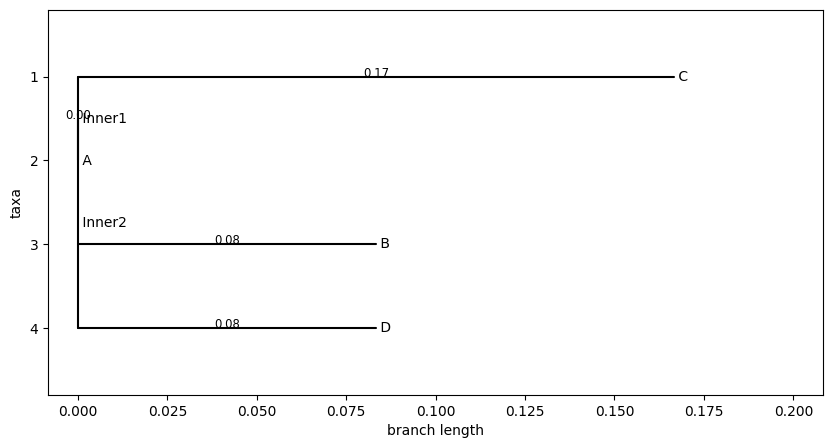

In [8]:
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from io import StringIO

# 例: FASTA形式の配列（実際はファイルから読み込み可能）
fasta_data = """>A
ATCGTACGATCG
>B
ATCGTTCGATCG
>C
ATGGTACGATCA
>D
ATCGTACGATTG
"""

# 文字列からFASTA読み込み（通常は AlignIO.read("file.fasta", "fasta")）
alignment = AlignIO.read(StringIO(fasta_data), "fasta")

# 距離行列の計算（モデルは "identity" or "blosum62", "trans", etc.）
calculator = DistanceCalculator("identity")
distance_matrix = calculator.get_distance(alignment)

# NJ法で系統樹構築
constructor = DistanceTreeConstructor()
tree = constructor.nj(distance_matrix)

# ASCII形式で系統樹を表示
Phylo.draw_ascii(tree)
# 画像形式で系統樹を表示
Phylo.draw(tree)

# 付加情報もりもりで系統樹を表示
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes, branch_labels=lambda c: f"{c.branch_length:.2f}" if c.branch_length else "")


In [ ]:
# 以下 ete3というのを試してみようとしたコードで1回成功しましたがなぜか安定していない。

In [ ]:
# from Bio import Phylo
# from Bio.Phylo.TreeConstruction import DistanceMatrix, DistanceTreeConstructor

# # 距離行列のラベル（配列名）
# names = ["A", "B", "C", "D", "E", "F", "G", "H"]

# # 距離行列（正方行列）
# square_matrix = [
#     [0, 5, 9, 9, 8, 7, 3, 6],
#     [5, 0, 10, 10, 9, 6, 4, 7],
#     [9, 10, 0, 8, 7, 9, 8, 5],
#     [9, 10, 8, 0, 3, 10, 9, 4],
#     [8, 9, 7, 3, 0, 9, 8, 3],
#     [7, 6, 9, 10, 9, 0, 6, 8],
#     [3, 4, 8, 9, 8, 6, 0, 7],
#     [6, 7, 5, 4, 3, 8, 7, 0]
# ]

# # 下三角行列に変換
# lower_triangle = []
# for i in range(len(square_matrix)):
#     lower_triangle.append([square_matrix[i][j] for j in range(i+1)])

# # 距離行列と系統樹の構築
# dm = DistanceMatrix(names, lower_triangle)
# constructor = DistanceTreeConstructor()
# tree = constructor.nj(dm)

# # ete3でリッチな可視化
# from io import StringIO
# from ete3 import Tree, TreeStyle

# # Bio.Phylo の tree を Newick 形式で一度書き出す
# handle = StringIO()
# Phylo.write(tree, handle, "newick")
# handle.seek(0)

# # ete3 に読み込む
# ete_tree = Tree(handle.read(), format=1)

# # スタイル設定（任意）
# ts = TreeStyle()
# ts.show_leaf_name = True
# ts.scale = 50

# # 表示
# ete_tree.show(tree_style=ts)